# Q3.1: Revised Team 22 Project

### Comments received
1. You may consider using geographical features to differentiate the carparks from each other.
Also, instead of using one ML model per carpark, we would recommend to use one model for all carparks.

2. The “web/phone application or integration with established wayfinding applications” is interesting and a good purpose, but it does not suit the theme of this module as much as doing data analysis. Do allocate your time and resources wisely if your team decide to do this.

### Revision of project
Having internalised the comments, we have decided to use a model for all carparks. By comparing 3 models (MLP,LR and LSTM), we will use the final selected model to predict a user-specified carpark availability for the next 24 hours.


### Preamble
With the steadily increasing motor vehicle population in Singapore of 957,006 in 2018 to 988,755 in 2021, parking demand also experiences an upward trend. Parking has become a major traffic issue for not only vehicle owners but also to local authorities in charge of allocating scarce land resources.

### Proposed Solution
In summary, our group wishes to create a carpark recommendation system with the ability to forecast demand. Determining the carpark’s demand at certain timeframes will be done using time-series forecast which utilised historical data to predict future demand trends. This system generally benefits vehicle owners but can be extended to be gain insights into state planning (land allocation for vehicle parking or congestion). 

From a user’s perspective, users could provide the destination (in GPS 
coordinates) and the system will provide the top-n nearest carparks and their respective current available lots. If users were to specify a timeframe in the future, they will be able to view a demand forecast graph (as seen in figure below) in hourly intervals. This feature allows users to plan their trips accordingly to avoid peak demand periods. 

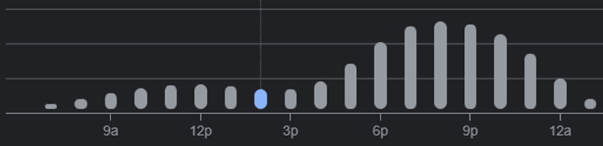


In [7]:
import pandas as pd
import numpy as np

# Data cleaning and preparation

We start by loading data from July to September 2022.

In [8]:
def load_data(month, days=31):
    full_df = pd.read_csv(f"./data/2022-{str(month)}-1.csv")
    for date in range(2, days+1):
        test_df = pd.read_csv(f'./data/2022-{str(month)}-{date}.csv')
        full_df = pd.concat([full_df, test_df])
    full_df['timestamp'] = pd.to_datetime(full_df['timestamp'])
    full_df = full_df.set_index('timestamp')
    return full_df

In [9]:
jul = load_data(7)
aug = load_data(8)
sep = load_data(9, days=30)
full_data = pd.concat([jul, aug, sep])
full_data.dropna(inplace=True)

In [10]:
full_data['available rate'] = full_data['lots_available'] / full_data['total_lots']
full_data.dropna(inplace=True)
grped_full = full_data.groupby(full_data.carpark_number)

In [5]:
# for key, item in grped_full:
#     print(grped_full.get_group(key), "\n\n")

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A10          64              26        C   
2022-07-01 00:30:00            A10          64              26        C   
2022-07-01 00:45:00            A10          64              25        C   
2022-07-01 01:00:00            A10          64              22        C   
2022-07-01 01:15:00            A10          64              23        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A10          62              34        C   
2022-09-30 20:00:00            A10          62              30        C   
2022-09-30 21:00:00            A10          62              36        C   
2022-09-30 22:00:00            A10          62              33        C   
2022-09-30 23:00:00            A10          62              33        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A59         172              20        C   
2022-07-01 00:30:00            A59         172              21        C   
2022-07-01 00:45:00            A59         172              21        C   
2022-07-01 01:00:00            A59         172              21        C   
2022-07-01 01:15:00            A59         172              20        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A59         172              85        C   
2022-09-30 20:00:00            A59         172              78        C   
2022-09-30 21:00:00            A59         172              72        C   
2022-09-30 22:00:00            A59         172              57        C   
2022-09-30 23:00:00            A59         172              45        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           AM20         676             391        C   
2022-07-01 00:30:00           AM20         676             390        C   
2022-07-01 00:45:00           AM20         676             388        C   
2022-07-01 01:00:00           AM20         676             387        C   
2022-07-01 01:15:00           AM20         676             385        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           AM20         676             486        C   
2022-09-30 20:00:00           AM20         676             451        C   
2022-09-30 21:00:00           AM20         676             436        C   
2022-09-30 22:00:00           AM20         676             411        C   
2022-09-30 23:00:00           AM20         676             392        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            B32         124              51        C   
2022-07-01 00:30:00            B32         124              50        C   
2022-07-01 00:45:00            B32         124              48        C   
2022-07-01 01:00:00            B32         124              48        C   
2022-07-01 01:15:00            B32         124              48        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            B32         124              66        C   
2022-09-30 20:00:00            B32         124              70        C   
2022-09-30 21:00:00            B32         124              65        C   
2022-09-30 22:00:00            B32         124              60        C   
2022-09-30 23:00:00            B32         124              55        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            B72         412             123        C   
2022-07-01 00:30:00            B72         412             121        C   
2022-07-01 00:45:00            B72         412             121        C   
2022-07-01 01:00:00            B72         412             118        C   
2022-07-01 01:15:00            B72         412             116        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            B72         412             257        C   
2022-09-30 20:00:00            B72         412             246        C   
2022-09-30 21:00:00            B72         412             219        C   
2022-09-30 22:00:00            B72         412             219        C   
2022-09-30 23:00:00            B72         412             219        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BBM2         285             124        C   
2022-07-01 00:30:00           BBM2         285             122        C   
2022-07-01 00:45:00           BBM2         285             119        C   
2022-07-01 01:00:00           BBM2         285             122        C   
2022-07-01 01:15:00           BBM2         285             121        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BBM2         285             161        C   
2022-09-30 20:00:00           BBM2         285             148        C   
2022-09-30 21:00:00           BBM2         285             144        C   
2022-09-30 22:00:00           BBM2         285             131        C   
2022-09-30 23:00:00           BBM2         285             127        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            BE5         647             179        C   
2022-07-01 00:30:00            BE5         647             174        C   
2022-07-01 00:45:00            BE5         647             180        C   
2022-07-01 01:00:00            BE5         647             177        C   
2022-07-01 01:15:00            BE5         647             178        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            BE5         647             326        C   
2022-09-30 20:00:00            BE5         647             325        C   
2022-09-30 21:00:00            BE5         647             309        C   
2022-09-30 22:00:00            BE5         647             264        C   
2022-09-30 23:00:00            BE5         647             237        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BJ41         389             174        C   
2022-07-01 00:30:00           BJ41         389             170        C   
2022-07-01 00:45:00           BJ41         389             173        C   
2022-07-01 01:00:00           BJ41         389             174        C   
2022-07-01 01:15:00           BJ41         389             169        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BJ41         389             259        C   
2022-09-30 20:00:00           BJ41         389             247        C   
2022-09-30 21:00:00           BJ41         389             233        C   
2022-09-30 22:00:00           BJ41         389             219        C   
2022-09-30 23:00:00           BJ41         389             191        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BL13         413             171        C   
2022-07-01 00:30:00           BL13         413             168        C   
2022-07-01 00:45:00           BL13         413             175        C   
2022-07-01 01:00:00           BL13         413             174        C   
2022-07-01 01:15:00           BL13         413             175        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BL13         413             254        C   
2022-09-30 20:00:00           BL13         413             241        C   
2022-09-30 21:00:00           BL13         413             234        C   
2022-09-30 22:00:00           BL13         413             218        C   
2022-09-30 23:00:00           BL13         413             203        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            BR5         150              36        C   
2022-07-01 00:30:00            BR5         150              32        C   
2022-07-01 00:45:00            BR5         150              31        C   
2022-07-01 01:00:00            BR5         150              28        C   
2022-07-01 01:15:00            BR5         150              28        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            BR5         150              64        C   
2022-09-30 20:00:00            BR5         150              63        C   
2022-09-30 21:00:00            BR5         150              60        C   
2022-09-30 22:00:00            BR5         150              53        C   
2022-09-30 23:00:00            BR5         150              47        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           C28M         305             179        C   
2022-07-01 00:30:00           C28M         305             177        C   
2022-07-01 00:45:00           C28M         305             177        C   
2022-07-01 01:00:00           C28M         305             176        C   
2022-07-01 01:15:00           C28M         305             178        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           C28M         305             235        C   
2022-09-30 20:00:00           C28M         305             217        C   
2022-09-30 21:00:00           C28M         305             219        C   
2022-09-30 22:00:00           C28M         305             214        C   
2022-09-30 23:00:00           C28M         305             201        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CK16         202               0        C   
2022-07-01 00:30:00           CK16         202               0        C   
2022-07-01 00:45:00           CK16         202               0        C   
2022-07-01 01:00:00           CK16         202               0        C   
2022-07-01 01:15:00           CK16         202               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CK16         202              27        C   
2022-09-30 20:00:00           CK16         202               8        C   
2022-09-30 21:00:00           CK16         202               0        C   
2022-09-30 22:00:00           CK16         202               0        C   
2022-09-30 23:00:00           CK16         202               0        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CK55         356              14        C   
2022-07-01 00:30:00           CK55         356              13        C   
2022-07-01 00:45:00           CK55         356              11        C   
2022-07-01 01:00:00           CK55         356              11        C   
2022-07-01 01:15:00           CK55         356              10        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CK55         356             142        C   
2022-09-30 20:00:00           CK55         356             120        C   
2022-09-30 21:00:00           CK55         356              98        C   
2022-09-30 22:00:00           CK55         356              71        C   
2022-09-30 23:00:00           CK55         356              57        C   

                     ava


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CKT2          81               0        C   
2022-07-01 00:30:00           CKT2          81               0        C   
2022-07-01 00:45:00           CKT2          81               0        C   
2022-07-01 01:00:00           CKT2          81               0        C   
2022-07-01 01:15:00           CKT2          81               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CKT2          81              26        C   
2022-09-30 20:00:00           CKT2          81              26        C   
2022-09-30 21:00:00           CKT2          81              18        C   
2022-09-30 22:00:00           CKT2          81              23        C   
2022-09-30 23:00:00           CKT2          81              23        C   

                     av

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            EC2         809             305        C   
2022-07-01 00:30:00            EC2         809             298        C   
2022-07-01 00:45:00            EC2         809             288        C   
2022-07-01 01:00:00            EC2         809             283        C   
2022-07-01 01:15:00            EC2         809             279        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            EC2         809               9        C   
2022-09-30 20:00:00            EC2         809               0        C   
2022-09-30 21:00:00            EC2         809               0        C   
2022-09-30 22:00:00            EC2         809               0        C   
2022-09-30 23:00:00            EC2         809               0        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00             H4         102              69        C   
2022-07-01 00:30:00             H4         102              72        C   
2022-07-01 00:45:00             H4         102              75        C   
2022-07-01 01:00:00             H4         102              76        C   
2022-07-01 01:15:00             H4         102              76        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00             H4         102              33        C   
2022-09-30 20:00:00             H4         102              11        C   
2022-09-30 21:00:00             H4         102              32        C   
2022-09-30 22:00:00             H4         102              56        C   
2022-09-30 23:00:00             H4         102              63        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG2C         483             257        C   
2022-07-01 00:30:00           HG2C         483             257        C   
2022-07-01 00:45:00           HG2C         483             258        C   
2022-07-01 01:00:00           HG2C         483             257        C   
2022-07-01 01:15:00           HG2C         483             257        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG2C         483             339        C   
2022-09-30 20:00:00           HG2C         483             325        C   
2022-09-30 21:00:00           HG2C         483             314        C   
2022-09-30 22:00:00           HG2C         483             296        C   
2022-09-30 23:00:00           HG2C         483             274        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG67        1100             531        C   
2022-07-01 00:30:00           HG67        1100             510        C   
2022-07-01 00:45:00           HG67        1100             499        C   
2022-07-01 01:00:00           HG67        1100             515        C   
2022-07-01 01:15:00           HG67        1100             534        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG67        1100             710        C   
2022-09-30 20:00:00           HG67        1100             675        C   
2022-09-30 21:00:00           HG67        1100             649        C   
2022-09-30 22:00:00           HG67        1100             618        C   
2022-09-30 23:00:00           HG67        1100             595        C   

                     ava

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            J12         243             129        C   
2022-07-01 00:30:00            J12         243             130        C   
2022-07-01 00:45:00            J12         243             124        C   
2022-07-01 01:00:00            J12         243             119        C   
2022-07-01 01:15:00            J12         243             118        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            J12         243               0        C   
2022-09-30 20:00:00            J12         243               0        C   
2022-09-30 21:00:00            J12         243              31        C   
2022-09-30 22:00:00            J12         243              53        C   
2022-09-30 23:00:00            J12         243              78        C  

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00             J5         192              99        C   
2022-07-01 00:30:00             J5         192              96        C   
2022-07-01 00:45:00             J5         192              97        C   
2022-07-01 01:00:00             J5         192              98        C   
2022-07-01 01:15:00             J5         192              97        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00             J5         192             133        C   
2022-09-30 20:00:00             J5         192             131        C   
2022-09-30 21:00:00             J5         192             121        C   
2022-09-30 22:00:00             J5         192             118        C   
2022-09-30 23:00:00             J5         192             114        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           J80S         360             353        C   
2022-07-01 00:30:00           J80S         360             353        C   
2022-07-01 00:45:00           J80S         360             353        C   
2022-07-01 01:00:00           J80S         360             353        C   
2022-07-01 01:15:00           J80S         360             353        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           J80S         360             353        C   
2022-09-30 20:00:00           J80S         360             353        C   
2022-09-30 21:00:00           J80S         360             353        C   
2022-09-30 22:00:00           J80S         360             353        C   
2022-09-30 23:00:00           J80S         360             353        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           JM11         573             362        C   
2022-07-01 00:30:00           JM11         573             362        C   
2022-07-01 00:45:00           JM11         573             361        C   
2022-07-01 01:00:00           JM11         573             358        C   
2022-07-01 01:15:00           JM11         573             358        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           JM11         573             460        C   
2022-09-30 20:00:00           JM11         573             448        C   
2022-09-30 21:00:00           JM11         573             427        C   
2022-09-30 22:00:00           JM11         573             403        C   
2022-09-30 23:00:00           JM11         573             392        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           JS1L          10               2        C   
2022-07-01 00:30:00           JS1L          10               0        C   
2022-07-01 00:45:00           JS1L          10               0        C   
2022-07-01 01:00:00           JS1L          10               2        C   
2022-07-01 01:15:00           JS1L          10               2        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           JS1L          10               0        C   
2022-09-30 20:00:00           JS1L          10               0        C   
2022-09-30 21:00:00           JS1L          10               0        C   
2022-09-30 22:00:00           JS1L          10               5        C   
2022-09-30 23:00:00           JS1L          10               2        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            KJ4         182              71        C   
2022-07-01 00:30:00            KJ4         182              69        C   
2022-07-01 00:45:00            KJ4         182              66        C   
2022-07-01 01:00:00            KJ4         182              70        C   
2022-07-01 01:15:00            KJ4         182              70        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            KJ4         182             109        C   
2022-09-30 20:00:00            KJ4         182             102        C   
2022-09-30 21:00:00            KJ4         182              94        C   
2022-09-30 22:00:00            KJ4         182              86        C   
2022-09-30 23:00:00            KJ4         182              83        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            MLM         507               0        C   
2022-07-01 00:30:00            MLM         507               0        C   
2022-07-01 00:45:00            MLM         507               0        C   
2022-07-01 01:00:00            MLM         507               0        C   
2022-07-01 01:15:00            MLM         507               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            MLM         277             119        C   
2022-09-30 20:00:00            MLM         277             119        C   
2022-09-30 21:00:00            MLM         277             119        C   
2022-09-30 22:00:00            MLM         277             119        C   
2022-09-30 23:00:00            MLM         277             119        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            MR7         105              45        C   
2022-07-01 00:30:00            MR7         105              45        C   
2022-07-01 00:45:00            MR7         105              45        C   
2022-07-01 01:00:00            MR7         105              45        C   
2022-07-01 01:15:00            MR7         105              45        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            MR7         105              45        C   
2022-09-30 20:00:00            MR7         105              45        C   
2022-09-30 21:00:00            MR7         105              45        C   
2022-09-30 22:00:00            MR7         105              45        C   
2022-09-30 23:00:00            MR7         105              45        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PDJ7         316             172        C   
2022-07-01 00:30:00           PDJ7         316             170        C   
2022-07-01 00:45:00           PDJ7         316             170        C   
2022-07-01 01:00:00           PDJ7         316             169        C   
2022-07-01 01:15:00           PDJ7         316             169        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PDJ7         316              68        C   
2022-09-30 20:00:00           PDJ7         316              71        C   
2022-09-30 21:00:00           PDJ7         316              83        C   
2022-09-30 22:00:00           PDJ7         316              82        C   
2022-09-30 23:00:00           PDJ7         316              81        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PL32         203              59        C   
2022-07-01 00:30:00           PL32         203              59        C   
2022-07-01 00:45:00           PL32         203              58        C   
2022-07-01 01:00:00           PL32         203              58        C   
2022-07-01 01:15:00           PL32         203              60        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PL32         203             123        C   
2022-09-30 20:00:00           PL32         203             115        C   
2022-09-30 21:00:00           PL32         203             110        C   
2022-09-30 22:00:00           PL32         203              94        C   
2022-09-30 23:00:00           PL32         203              86        C   

                     ava


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PL68         366             169        C   
2022-07-01 00:30:00           PL68         366             167        C   
2022-07-01 00:45:00           PL68         366             165        C   
2022-07-01 01:00:00           PL68         366             165        C   
2022-07-01 01:15:00           PL68         366             165        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PL68         366             246        C   
2022-09-30 20:00:00           PL68         366             228        C   
2022-09-30 21:00:00           PL68         366             230        C   
2022-09-30 22:00:00           PL68         366             215        C   
2022-09-30 23:00:00           PL68         366             197        C   

                     av

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PM33         448             120        C   
2022-07-01 00:30:00           PM33         448             120        C   
2022-07-01 00:45:00           PM33         448             116        C   
2022-07-01 01:00:00           PM33         448             113        C   
2022-07-01 01:15:00           PM33         448             112        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PM33         448             268        C   
2022-09-30 20:00:00           PM33         448             250        C   
2022-09-30 21:00:00           PM33         448             228        C   
2022-09-30 22:00:00           PM33         448             209        C   
2022-09-30 23:00:00           PM33         448             178        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            PRM         576             496        C   
2022-07-01 00:30:00            PRM         576             496        C   
2022-07-01 00:45:00            PRM         576             497        C   
2022-07-01 01:00:00            PRM         576             497        C   
2022-07-01 01:15:00            PRM         576             498        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            PRM         576             263        C   
2022-09-30 20:00:00            PRM         576             285        C   
2022-09-30 21:00:00            PRM         576             367        C   
2022-09-30 22:00:00            PRM         576             432        C   
2022-09-30 23:00:00            PRM         576             466        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            RHM         329             134        C   
2022-07-01 00:30:00            RHM         329             134        C   
2022-07-01 00:45:00            RHM         329             134        C   
2022-07-01 01:00:00            RHM         329             134        C   
2022-07-01 01:15:00            RHM         329             134        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            RHM         329             165        C   
2022-09-30 20:00:00            RHM         329             133        C   
2022-09-30 21:00:00            RHM         329             133        C   
2022-09-30 22:00:00            RHM         329             137        C   
2022-09-30 23:00:00            RHM         329             137        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SB17         561             396        C   
2022-07-01 00:30:00           SB17         561             397        C   
2022-07-01 00:45:00           SB17         561             397        C   
2022-07-01 01:00:00           SB17         561             396        C   
2022-07-01 01:15:00           SB17         561             396        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SB17         561             482        C   
2022-09-30 20:00:00           SB17         561             458        C   
2022-09-30 21:00:00           SB17         561             450        C   
2022-09-30 22:00:00           SB17         561             432        C   
2022-09-30 23:00:00           SB17         561             420        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SB44         505             216        C   
2022-07-01 00:30:00           SB44         505             214        C   
2022-07-01 00:45:00           SB44         505             215        C   
2022-07-01 01:00:00           SB44         505             210        C   
2022-07-01 01:15:00           SB44         505             211        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SB44         505             347        C   
2022-09-30 20:00:00           SB44         505             323        C   
2022-09-30 21:00:00           SB44         505             290        C   
2022-09-30 22:00:00           SB44         505             271        C   
2022-09-30 23:00:00           SB44         505             249        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SE31         187               9        C   
2022-07-01 00:30:00           SE31         187               7        C   
2022-07-01 00:45:00           SE31         187               8        C   
2022-07-01 01:00:00           SE31         187               7        C   
2022-07-01 01:15:00           SE31         187               7        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SE31         187              77        C   
2022-09-30 20:00:00           SE31         187              64        C   
2022-09-30 21:00:00           SE31         187              49        C   
2022-09-30 22:00:00           SE31         187              20        C   
2022-09-30 23:00:00           SE31         187              22        C   

                     ava

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            SI9         190              48        C   
2022-07-01 00:30:00            SI9         190              47        C   
2022-07-01 00:45:00            SI9         190              48        C   
2022-07-01 01:00:00            SI9         190              47        C   
2022-07-01 01:15:00            SI9         190              44        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            SI9         179              88        C   
2022-09-30 20:00:00            SI9         179              78        C   
2022-09-30 21:00:00            SI9         179              77        C   
2022-09-30 22:00:00            SI9         179              65        C   
2022-09-30 23:00:00            SI9         179              48        C  

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK38         658             379        C   
2022-07-01 00:30:00           SK38         658             376        C   
2022-07-01 00:45:00           SK38         658             374        C   
2022-07-01 01:00:00           SK38         658             372        C   
2022-07-01 01:15:00           SK38         658             370        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK38         658             483        C   
2022-09-30 20:00:00           SK38         658             471        C   
2022-09-30 21:00:00           SK38         658             456        C   
2022-09-30 22:00:00           SK38         658             438        C   
2022-09-30 23:00:00           SK38         658             419        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK72         200              28        C   
2022-07-01 00:30:00           SK72         200              30        C   
2022-07-01 00:45:00           SK72         200              28        C   
2022-07-01 01:00:00           SK72         200              27        C   
2022-07-01 01:15:00           SK72         200              27        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK72         200             102        C   
2022-09-30 20:00:00           SK72         200              73        C   
2022-09-30 21:00:00           SK72         200              73        C   
2022-09-30 22:00:00           SK72         200              58        C   
2022-09-30 23:00:00           SK72         200              48        C   

                     ava


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           STM2         199              92        C   
2022-07-01 00:30:00           STM2         199              92        C   
2022-07-01 00:45:00           STM2         199              92        C   
2022-07-01 01:00:00           STM2         199              92        C   
2022-07-01 01:15:00           STM2         199              92        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           STM2         199              91        C   
2022-09-30 20:00:00           STM2         199              91        C   
2022-09-30 21:00:00           STM2         199              91        C   
2022-09-30 22:00:00           STM2         199              91        C   
2022-09-30 23:00:00           STM2         199              91        C   

                     av

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            T55           8               7        C   
2022-07-01 00:30:00            T55           8               8        C   
2022-07-01 00:45:00            T55           8               8        C   
2022-07-01 01:00:00            T55           8               8        C   
2022-07-01 01:15:00            T55           8               7        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            T55           8               0        C   
2022-09-30 20:00:00            T55           8               0        C   
2022-09-30 21:00:00            T55           8               2        C   
2022-09-30 22:00:00            T55           8               4        C   
2022-09-30 23:00:00            T55           8               2        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TBC2         264             142        C   
2022-07-01 00:30:00           TBC2         264             141        C   
2022-07-01 00:45:00           TBC2         264             141        C   
2022-07-01 01:00:00           TBC2         264             141        C   
2022-07-01 01:15:00           TBC2         264             139        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TBC2         264             175        C   
2022-09-30 20:00:00           TBC2         264             176        C   
2022-09-30 21:00:00           TBC2         264             168        C   
2022-09-30 22:00:00           TBC2         264             168        C   
2022-09-30 23:00:00           TBC2         264             148        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TJ33         441             183        C   
2022-07-01 00:30:00           TJ33         441             181        C   
2022-07-01 00:45:00           TJ33         441             181        C   
2022-07-01 01:00:00           TJ33         441             177        C   
2022-07-01 01:15:00           TJ33         441             176        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TJ33         441             300        C   
2022-09-30 20:00:00           TJ33         441             280        C   
2022-09-30 21:00:00           TJ33         441             271        C   
2022-09-30 22:00:00           TJ33         441             238        C   
2022-09-30 23:00:00           TJ33         441             212        C   

                     ava


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TM42         261             232        C   
2022-07-01 00:30:00           TM42         261             232        C   
2022-07-01 00:45:00           TM42         261             232        C   
2022-07-01 01:00:00           TM42         261             232        C   
2022-07-01 01:15:00           TM42         261             231        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TM42         261             193        C   
2022-09-30 20:00:00           TM42         261             199        C   
2022-09-30 21:00:00           TM42         261             220        C   
2022-09-30 22:00:00           TM42         261             226        C   
2022-09-30 23:00:00           TM42         261             229        C   

                     av

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TP50         296             159        C   
2022-07-01 00:30:00           TP50         296             159        C   
2022-07-01 00:45:00           TP50         296             159        C   
2022-07-01 01:00:00           TP50         296             159        C   
2022-07-01 01:15:00           TP50         296             159        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TP50         296             159        C   
2022-09-30 20:00:00           TP50         296             159        C   
2022-09-30 21:00:00           TP50         296             159        C   
2022-09-30 22:00:00           TP50         296             159        C   
2022-09-30 23:00:00           TP50         296             159        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TPMP         808             169        C   
2022-07-01 00:30:00           TPMP         808             165        C   
2022-07-01 00:45:00           TPMP         808             166        C   
2022-07-01 01:00:00           TPMP         808             163        C   
2022-07-01 01:15:00           TPMP         808             163        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TPMP         808             413        C   
2022-09-30 20:00:00           TPMP         808             376        C   
2022-09-30 21:00:00           TPMP         808             325        C   
2022-09-30 22:00:00           TPMP         808             273        C   
2022-09-30 23:00:00           TPMP         808             236        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            U34         303              64        C   
2022-07-01 00:30:00            U34         303              64        C   
2022-07-01 00:45:00            U34         303              63        C   
2022-07-01 01:00:00            U34         303              57        C   
2022-07-01 01:15:00            U34         303              57        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            U34         303             131        C   
2022-09-30 20:00:00            U34         303             130        C   
2022-09-30 21:00:00            U34         303             115        C   
2022-09-30 22:00:00            U34         303              99        C   
2022-09-30 23:00:00            U34         303              80        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W10         116              43        C   
2022-07-01 00:30:00            W10         116              44        C   
2022-07-01 00:45:00            W10         116              42        C   
2022-07-01 01:00:00            W10         116              43        C   
2022-07-01 01:15:00            W10         116              44        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W10         116              54        C   
2022-09-30 20:00:00            W10         116              55        C   
2022-09-30 21:00:00            W10         116              45        C   
2022-09-30 22:00:00            W10         116              48        C   
2022-09-30 23:00:00            W10         116              36        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W36         539             129        C   
2022-07-01 00:30:00            W36         539             131        C   
2022-07-01 00:45:00            W36         539             129        C   
2022-07-01 01:00:00            W36         539             124        C   
2022-07-01 01:15:00            W36         539             122        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W36         539             258        C   
2022-09-30 20:00:00            W36         539             227        C   
2022-09-30 21:00:00            W36         539             194        C   
2022-09-30 22:00:00            W36         539             171        C   
2022-09-30 23:00:00            W36         539             149        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W5M         350             218        C   
2022-07-01 00:30:00            W5M         350             216        C   
2022-07-01 00:45:00            W5M         350             215        C   
2022-07-01 01:00:00            W5M         350             214        C   
2022-07-01 01:15:00            W5M         350             214        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W5M         350             286        C   
2022-09-30 20:00:00            W5M         350             273        C   
2022-09-30 21:00:00            W5M         350             259        C   
2022-09-30 22:00:00            W5M         350             247        C   
2022-09-30 23:00:00            W5M         350             238        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W8M         217              88        C   
2022-07-01 00:30:00            W8M         217              84        C   
2022-07-01 00:45:00            W8M         217              82        C   
2022-07-01 01:00:00            W8M         217              82        C   
2022-07-01 01:15:00            W8M         217              82        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W8M         217             129        C   
2022-09-30 20:00:00            W8M         217             120        C   
2022-09-30 21:00:00            W8M         217             113        C   
2022-09-30 22:00:00            W8M         217             110        C   
2022-09-30 23:00:00            W8M         217             102        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            Y34        1189             466        C   
2022-07-01 00:30:00            Y34        1189             468        C   
2022-07-01 00:45:00            Y34        1189             459        C   
2022-07-01 01:00:00            Y34        1189             457        C   
2022-07-01 01:15:00            Y34        1189             452        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            Y34        1189             689        C   
2022-09-30 20:00:00            Y34        1189             641        C   
2022-09-30 21:00:00            Y34        1189             622        C   
2022-09-30 22:00:00            Y34        1189             589        C   
2022-09-30 23:00:00            Y34        1189             547        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           Y68M         595             219        C   
2022-07-01 00:30:00           Y68M         595             218        C   
2022-07-01 00:45:00           Y68M         595             219        C   
2022-07-01 01:00:00           Y68M         595             213        C   
2022-07-01 01:15:00           Y68M         595             214        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           Y68M         595             392        C   
2022-09-30 20:00:00           Y68M         595             351        C   
2022-09-30 21:00:00           Y68M         595             316        C   
2022-09-30 22:00:00           Y68M         595             281        C   
2022-09-30 23:00:00           Y68M         595             264        C   

                     ava

For each carpark, we use the first 70% as training data and last 30% as testing data. We will use previous 8*24 hours availability as features to predict the next 24 hours availability.
We slice out the data for each carpark and resample them to fill in missing values. Then we prepare training and testing features and labels.

In [11]:
# helper method to create inputs and outputs from a given dataset
def prep_train_test(dataset, feature_len):
    X = []
    Y = []
    for i in range(feature_len, len(dataset)-24):
        X.append(dataset['available rate'][i-feature_len:i].values)
        Y.append(dataset['available rate'][i:i+24].values)
        # if np.isnan(X[-1]).any():
        #     print(X[-1])
        # if np.isnan(Y[-1]).any():
        #     print(Y[-1])
    return X, Y

In [12]:
carparks = grped_full.carpark_number.unique()
print(carparks)
trainX, trainY = [], []
testX, testY = [], []
feature_len = 24*8
split = 0.3
print("total ids:", len(carparks))
index = 0
for id in carparks:
    slice = grped_full.get_group(id[0])
    slice = slice.resample('1h').mean()
    if slice.shape[0] != 2208:
        print(slice.shape[0])
        print("Lossy data. Dropped")
        continue
    if slice.isnull().values.any():
        slice.fillna(method='ffill', inplace=True)
    split_index = int(slice.shape[0] * split)
    X_train1, Y_train1 = prep_train_test(slice[:split_index], feature_len)
    X_test1, Y_test1 = prep_train_test(slice[split_index:], feature_len)
    trainX.extend(X_train1)
    trainY.extend(Y_train1)
    testX.extend(X_test1)
    testY.extend(Y_test1)
    index += 1
    if index % 100 == 0:
        print(index, "done")
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)


carpark_number
A10      [A10]
A100    [A100]
A11      [A11]
A12      [A12]
A13      [A13]
         ...  
Y78M    [Y78M]
Y8        [Y8]
Y82M    [Y82M]
Y9        [Y9]
YHS      [YHS]
Name: carpark_number, Length: 1965, dtype: object
total ids: 1965
855
Lossy data. Dropped
100 done
200 done
300 done
400 done
500 done
730
Lossy data. Dropped
730
Lossy data. Dropped
600 done
700 done
800 done
900 done
1000 done
1100 done
83
Lossy data. Dropped
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done


In [8]:
display(testY)

array([[0.6640625 , 0.625     , 0.625     , ..., 0.40234375, 0.4140625 ,
        0.42578125],
       [0.625     , 0.625     , 0.6171875 , ..., 0.4140625 , 0.42578125,
        0.48046875],
       [0.625     , 0.6171875 , 0.5078125 , ..., 0.42578125, 0.48046875,
        0.4609375 ],
       ...,
       [0.328125  , 0.328125  , 0.328125  , ..., 0.328125  , 0.55497159,
        0.328125  ],
       [0.328125  , 0.328125  , 0.328125  , ..., 0.55497159, 0.328125  ,
        0.328125  ],
       [0.328125  , 0.328125  , 0.328125  , ..., 0.328125  , 0.328125  ,
        0.328125  ]])

In [9]:
print("train test length:", trainX.shape, trainY.shape)
print("testing test length:", testX.shape, testY.shape)
print("input shape:", trainX[0].shape)
print("output shape:", trainY[0].shape)

train test length: (874606, 192) (874606, 24)
testing test length: (2608130, 192) (2608130, 24)
input shape: (192,)
output shape: (24,)


# Finding the best model
The following section shows the deliberation behind the decision of the final model. This is an extension of question 2 where we have found the linear regression model to be the best performing out of the 3 pre-selected models with Support Vector Regressor and Decision Tree Regressor models as the alternatives. Here, we have experimented with Multi-layer Perceptron(MLP) and Long Short-Term Memory(LSTM) models to arrive at our final decided model used in our simulated application where users can see the predicted availability of a carpark.

# Model 1: Multi-layer perceptron (MLP)

### In this section, we will use MLP model to predict the parking availability within the next 24 hours

In [13]:
# Import libraries
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [14]:
## Q3 data
print(trainX.dtype,trainY.dtype)
print(testX.dtype,testY.dtype)
print(np.isnan(trainX).any() ,np.isnan(trainY).any())
print(np.isnan(testX).any() ,np.isnan(testY).any())
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

float64 float64
float64 float64
False False
False False
(874606, 192) (874606, 24)
(2608130, 192) (2608130, 24)


#### MLP regressor

In [ ]:
#Train the data with MLP regressor
model = MLPRegressor(activation='relu', hidden_layer_sizes=(200, 50),
             max_iter=50, solver='adam', verbose=True, early_stopping=True)
model.fit(trainX, trainY)
print(model)

In [ ]:
# Saving the model
import pickle
filename = 'models/mlp_sklearn_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [15]:
# Loading the model
import pickle
model = pickle.load(open('models/mlp_sklearn_model.sav', 'rb'))
Y_pred = model.predict(testX)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

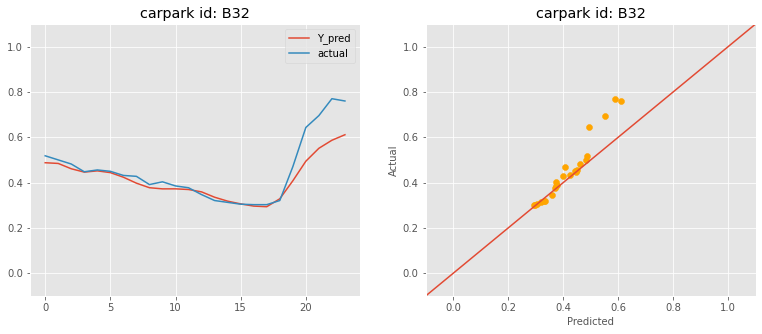

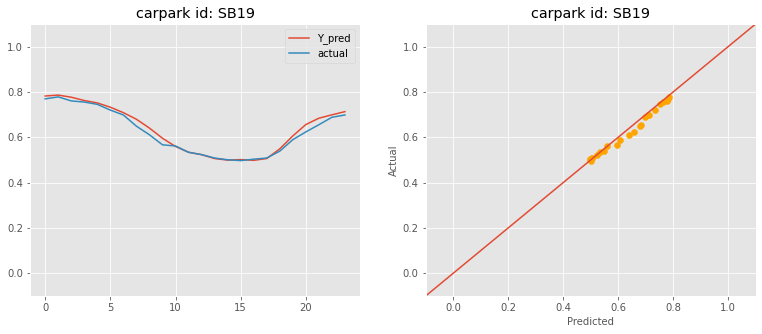

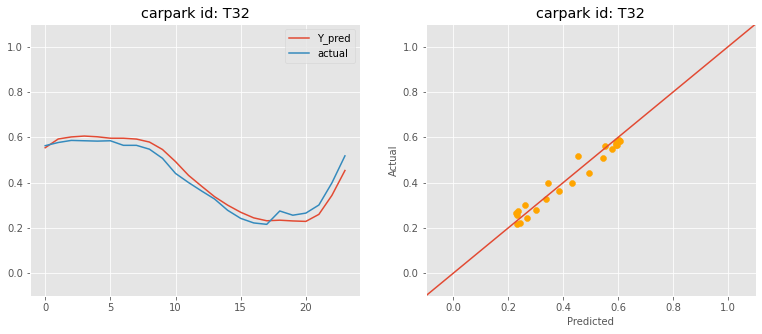

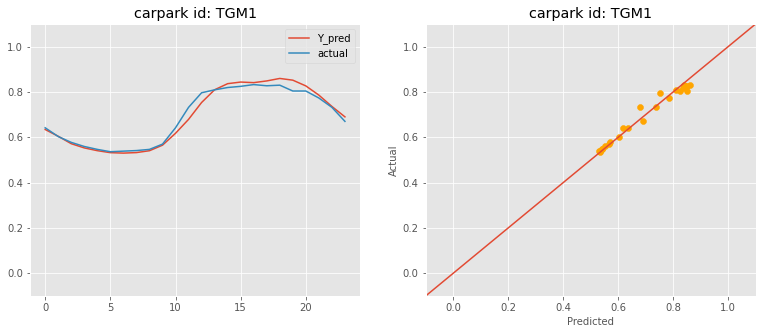

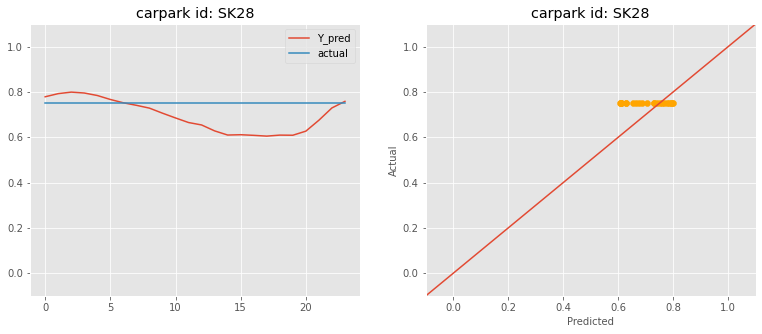

In [17]:
import random
for idx in range(5):
    idx = random.randint(0, len(testX))
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(idx)}" )
    plt.plot(Y_pred[idx], label='Y_pred')
    plt.plot(testY[idx], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(idx)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(Y_pred[idx], testY[idx], label='Y_pred', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

### General Performance
From the statistic below, The MLP model has a very high R Square value of 0.9476 which indicates a good fit between predicted and actual value. It means that the output's variance can be very well explained by the variance in the input features.

The percentage error at 4.13% means that the predicted values are very close to the actual values.

From these metrics, it can be seen that MLP is a fairly good model for this data distribution.

From the randomly selected scatter plots, we can see that the points are all very close to the line y=x, which means that the predicted availability is very close to the actual availability.

Thus, based on above evidence, the model is a good fit for our distribution. We have established that MLP model is a good fit from Q2 and the above substantiation.

In [18]:
mlp_r2 = metrics.r2_score(testY, Y_pred)
mlp_mse = metrics.mean_squared_error(testY, Y_pred)
mlp_abs_error = mean_absolute_error(testY, Y_pred)
print(f"Model's r2score: {mlp_r2},\nMSE: {mlp_mse},\nMean Absolute Error: {mlp_abs_error*100} %")

Model's r2score: 0.9481734340172521,
MSE: 0.005574083611802591,
Mean Absolute Error: 3.950890297653124 %


## Error across time
Next we try to see how the performance of the model changes according to the prediction hours in future. This is done by plotting the performance metrics - r2score, mean squared error and mean absolute error, accross hours of prediction.

From the graph below, we can see that the model performs very well in the short run. Even though the MSE and MAE increases with prediction hours, the error peak is still within an acceptable range. The R2 score is around 0.93 at 24 hours which still indicates a good fit between actual and predicted values. Overall, the predictions are extremely accurate for the next 24hrs with its accuracy slowly dwindling

Text(0.5, 0, 'Hour')

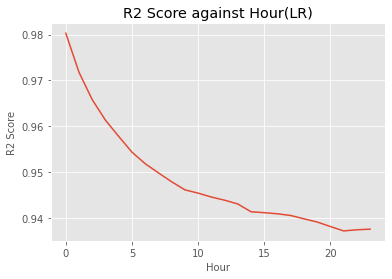

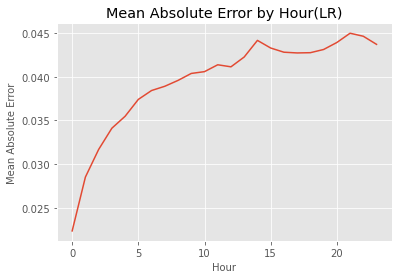

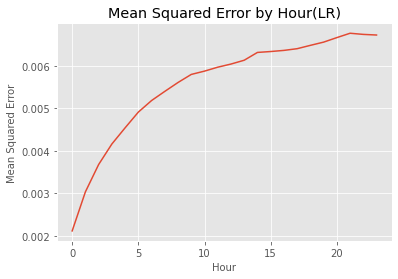

In [19]:
mlp_r2_ls = []
mlp_mse_ls = []
mlp_abs_error_ls = []
for i in range (24):
    mlp_r2_ls.append(metrics.r2_score(testY.transpose()[i], Y_pred.transpose()[i]))
    mlp_mse_ls.append(metrics.mean_squared_error(testY.transpose()[i], Y_pred.transpose()[i]))
    mlp_abs_error_ls.append(mean_absolute_error(testY.transpose()[i], Y_pred.transpose()[i]))
plt.figure()
plt.plot(mlp_r2_ls)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)

plt.figure()
plt.plot(mlp_abs_error_ls)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)

plt.figure()
plt.plot(mlp_mse_ls)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)



# Model 2: Linear Regression

In this section, we will use Linear Regression model to predict the parking availability of the next 24 hours. From Q2, we have established that LR model is has generally a better performance than SVR and DT. Here, we will investigate if it has better performance that MLP and LSTM.

First, we fit our LR model with the trainX and trainY. The training and test sets are derived from the original data set with a ratio of 70%:30% respectively.

In [52]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(trainX, trainY)

LinearRegression()

The following kernel is such that the train model will be saved for future runs (assuming training set remains the same).

In [53]:
# Saving the model
import pickle
pickle.dump(model_lr, open(filename, 'wb'))

NameError: name 'filename' is not defined

In [54]:
# Loading the saved model
filename = 'models/lr_sklearn_model.sav'
model_lr = pickle.load(open(filename, 'rb'))
y_pred_lr = model_lr.predict(testX)
display(trainX)

array([[0.40104167, 0.33984375, 0.328125  , ..., 0.5859375 , 0.5625    ,
        0.51953125],
       [0.33984375, 0.328125  , 0.328125  , ..., 0.5625    , 0.51953125,
        0.46875   ],
       [0.328125  , 0.328125  , 0.32421875, ..., 0.51953125, 0.46875   ,
        0.453125  ],
       ...,
       [0.43772727, 0.43772727, 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ],
       [0.43772727, 0.40625   , 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ],
       [0.40625   , 0.40625   , 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ]])

In [55]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

This section will randomly select 10 carparks and display the actual and predicted data for the time frame. This is solely for visualisation purposes. 

randomList: [854812, 418103, 1842447, 325962, 2461224, 9993, 2165898, 1544441, 1458591, 2532329]


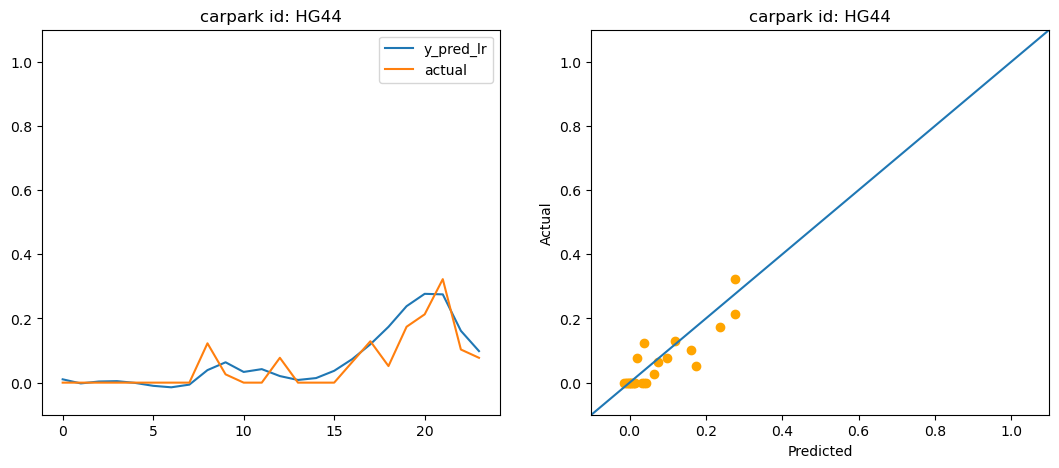

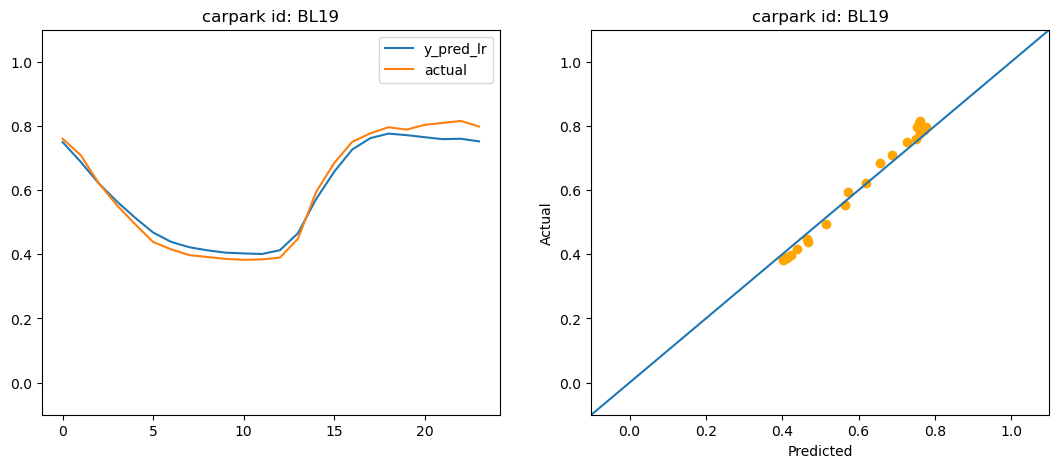

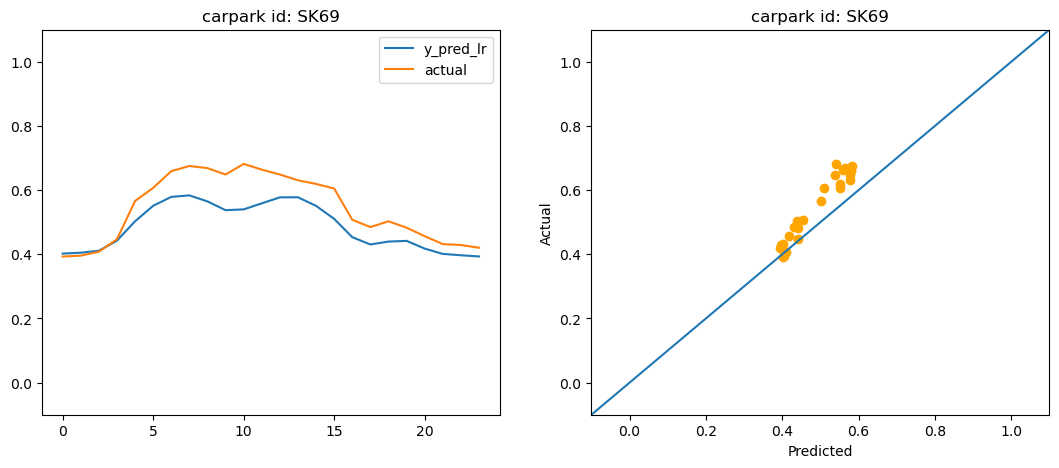

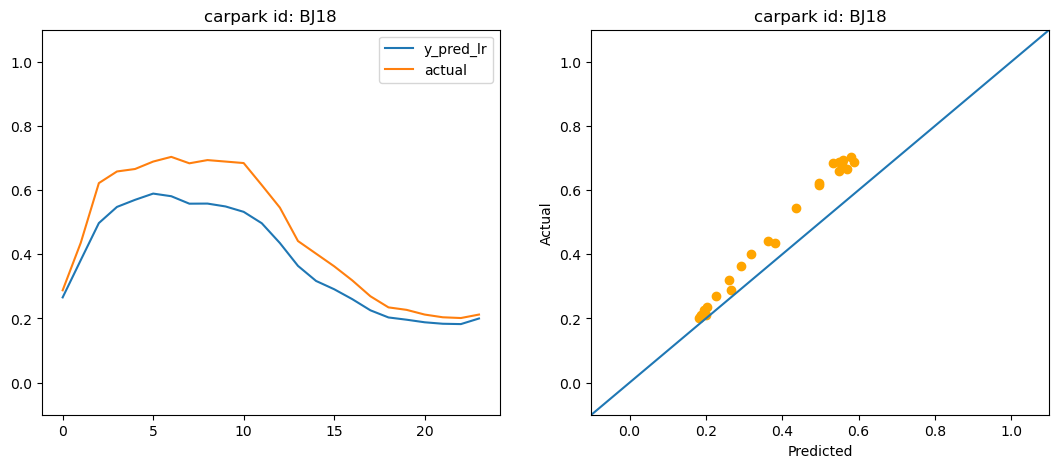

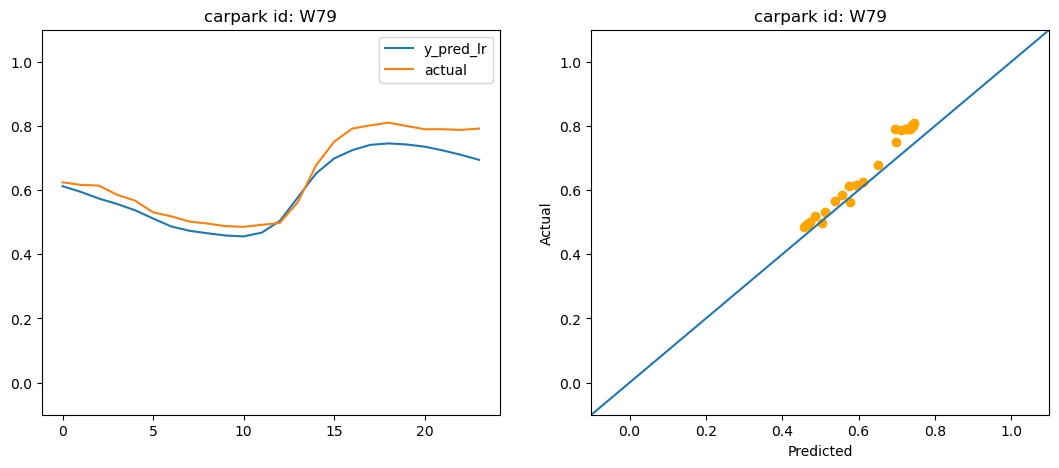

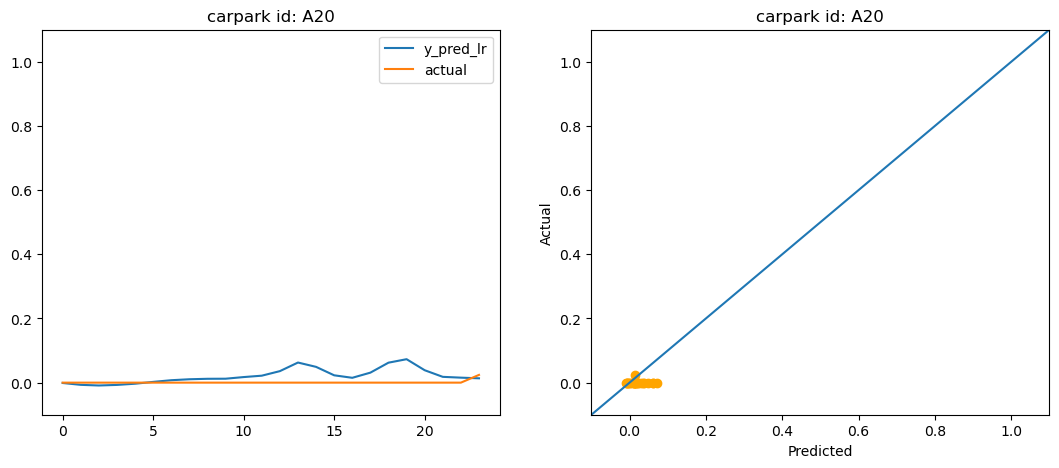

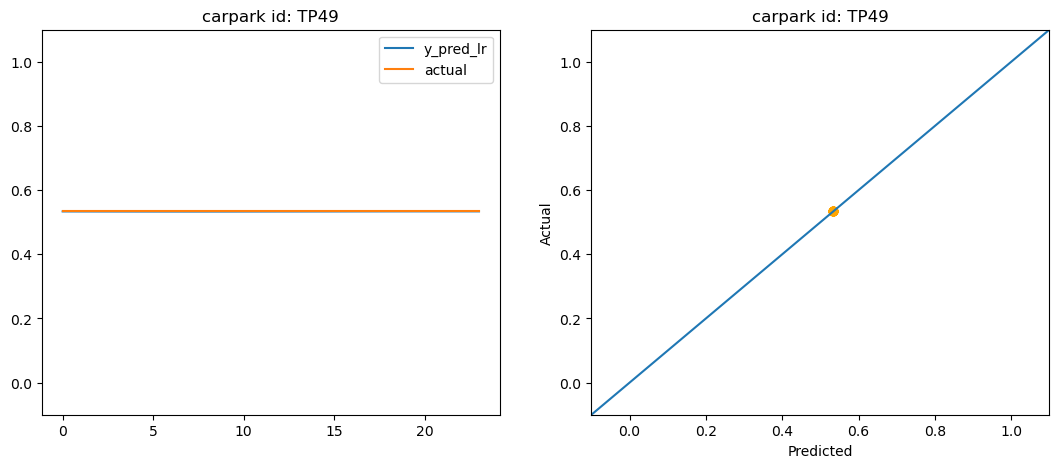

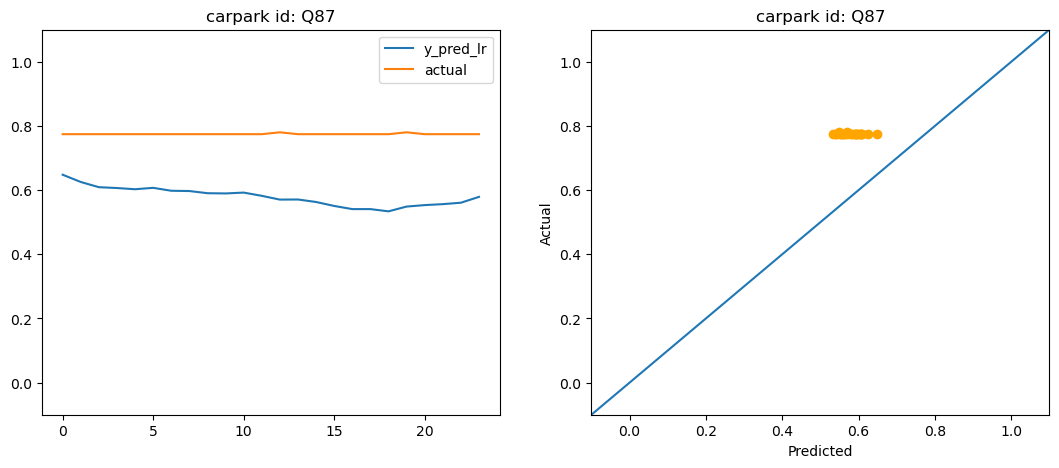

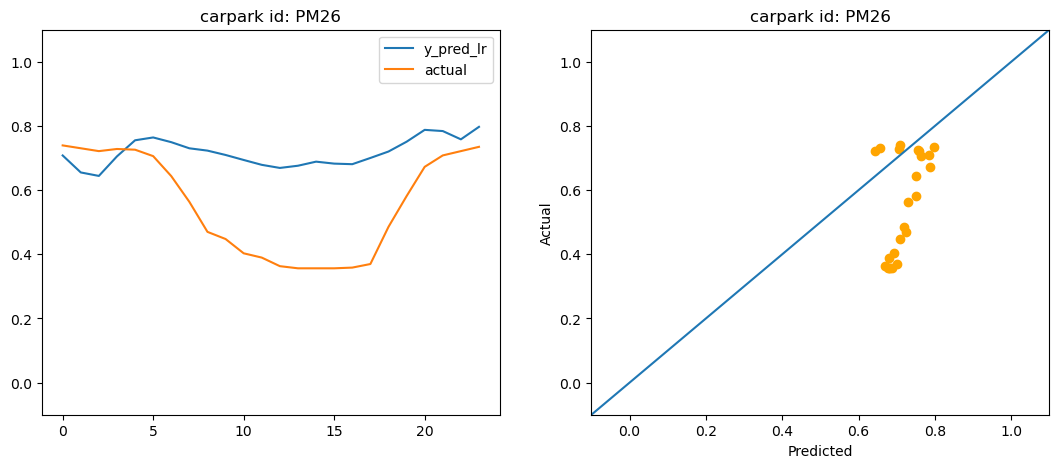

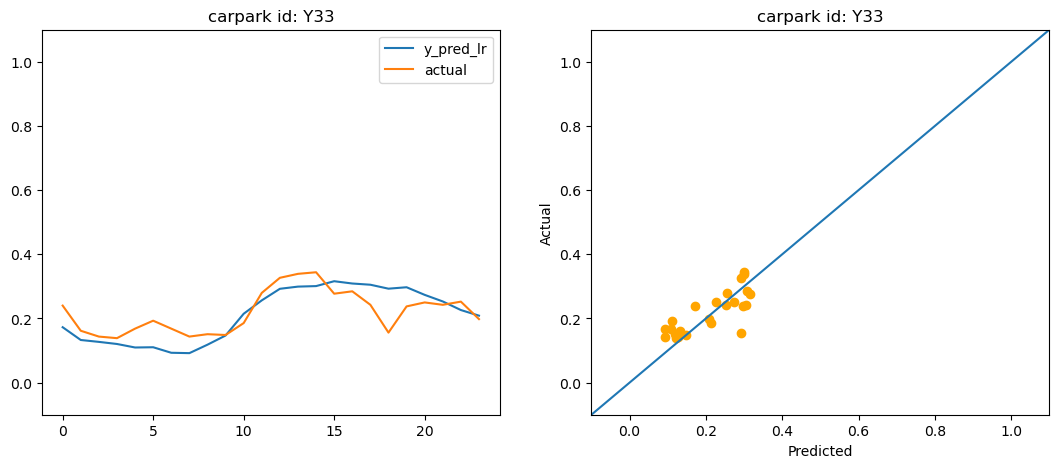

In [56]:
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
randomList = [random.randint(0,len(testY)) for i in range(10)]
print(f"randomList: {randomList}")

for i in randomList:
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.plot(y_pred_lr[i], label='y_pred_lr')
    plt.plot(testY[i], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(y_pred_lr[i], testY[i], label='y_pred_lr', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)


### Intepretation of model's performance
The LR model has a very high R Square value of 0.948 which indicates a good fit between predicted and actual value. It means that the output's variance can be very well explained by the variance in the input features.

The percentage error at 4.07% means that the predicted values are very close to the actual values.

From these metrics, it can be seen that LR is a fairly good model for this data distribution.

From the randomly selected scatter plots, we can see that the points are all very close to the line y=x, which means that the predicted availability is very close to the actual availability.

Thus, based on above evidence, the model is a good fit for our distribution. We have established that LR model is a good fit from Q2 and the above substantiation.

In [59]:
lr_r2 = metrics.r2_score(testY, y_pred_lr)
lr_mse = metrics.mean_squared_error(testY, y_pred_lr)
lr_abs_error = mean_absolute_error(testY, y_pred_lr)
print(f"Model's r2score: {lr_r2},\nMSE: {lr_mse},\nPercentage Error: {lr_abs_error*100} %\n")

Model's r2score: 0.9480106634767015,
MSE: 0.005591564842698374,
Percentage Error: 4.0711792803509494 %



### Error vs Time graph
From the graphs below, we can see that our predictions are extremely accurate in the short run and we can see that mean absolute error plateaus at a low value that is less than 0.045. The mean squared error can also be seen increasing at a decreasing rate to about 0.65% at 20hrs after the keyed in time. Overall, the predictions are extremely accurate for the next 24hrs with its accuracy slowly dwindling 



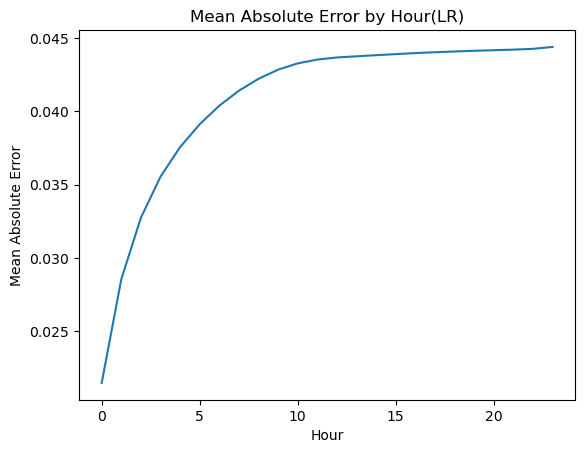

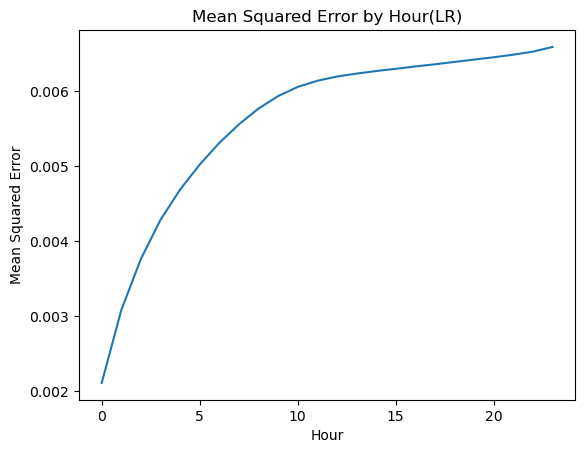

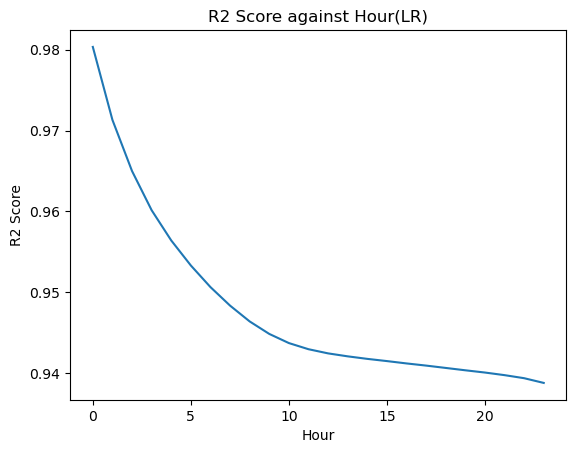

In [58]:
ae_by_hr = []
mse_by_hr = []
r2_by_hr = []
for i in range(24):
    # print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY[:,i], y_pred_lr[:,i])) )
    # print("               R2 Score is {}" .format(r2_score(testY[:,i], y_pred_lr[:,i])) )
    mse = mean_squared_error(testY[:,i], y_pred_lr[:,i])
    ae = mean_absolute_error(testY[:,i], y_pred_lr[:,i])
    r2 = r2_score(testY[:,i], y_pred_lr[:,i])
    # print("               Absolute Error is {}%" .format(100*ae))
    ae_by_hr.append(ae)
    mse_by_hr.append(mse)
    r2_by_hr.append(r2)
plt.plot(ae_by_hr)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(mse_by_hr)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(r2_by_hr)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()

# Model 3: LSTM
This is a proble where, given the parking availability of the past 8*24 hours,we are trying to predict the parking availability of the next 24 hour of a specific carpark. The data ranges from July 2022 to September 2022. 
In this section we will use the Long Short-Term Memory network to predict the parking availability. LSTM is good at predicting time-series data, we will investigeate whether it has better performance than MLP and LR.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

The LSTM network expects the input data to be provided with a specific array structure in the form of [samples, time steps, features]. Currently the data is in the form of [samples,time]

In [41]:
# reshape input to be [samples, time steps, features]
trainX1 = np.reshape(trainX, (trainX.shape[0], 8, 24))
testX1 = np.reshape(testX, (testX.shape[0], 8, 24))
print(trainX1.shape)
print(trainY.shape)


(874606, 8, 24)
(874606, 24)


In [44]:
# create and fit the LSTM network
modelX = Sequential()
modelX.add(LSTM(8, input_shape=(8,24), activation="relu"))
modelX.add(Dense(24))
modelX.compile(loss='mean_squared_error', optimizer='adam')
modelX.fit(trainX1, trainY, epochs=50, batch_size=64, verbose=2)

Epoch 1/50
13666/13666 - 61s - loss: 0.0134 - 61s/epoch - 4ms/step
Epoch 2/50
13666/13666 - 62s - loss: 0.0063 - 62s/epoch - 5ms/step
Epoch 3/50
13666/13666 - 59s - loss: 0.0059 - 59s/epoch - 4ms/step
Epoch 4/50
13666/13666 - 58s - loss: 0.0056 - 58s/epoch - 4ms/step
Epoch 5/50
13666/13666 - 58s - loss: 0.0056 - 58s/epoch - 4ms/step
Epoch 6/50
13666/13666 - 58s - loss: 0.0054 - 58s/epoch - 4ms/step
Epoch 7/50
13666/13666 - 58s - loss: 0.0053 - 58s/epoch - 4ms/step
Epoch 8/50
13666/13666 - 58s - loss: 0.0052 - 58s/epoch - 4ms/step
Epoch 9/50
13666/13666 - 58s - loss: 0.0052 - 58s/epoch - 4ms/step
Epoch 10/50
13666/13666 - 58s - loss: 0.0052 - 58s/epoch - 4ms/step
Epoch 11/50
13666/13666 - 59s - loss: 0.0052 - 59s/epoch - 4ms/step
Epoch 12/50
13666/13666 - 58s - loss: 0.0052 - 58s/epoch - 4ms/step
Epoch 13/50
13666/13666 - 58s - loss: 0.0052 - 58s/epoch - 4ms/step
Epoch 14/50
13666/13666 - 58s - loss: 0.0051 - 58s/epoch - 4ms/step
Epoch 15/50
13666/13666 - 59s - loss: 0.0051 - 59s/epoch 

In [45]:
# Save the model
# model.save('models/lstm_tf_model.h5')
modelX.save('models/lstm_tf_model_824.h5')

In [46]:
loaded = tf.keras.models.load_model('models/lstm_tf_model_824.h5')
ypred_lstm = loaded.predict(testX1)
print(ypred_lstm.shape)
#show model info
# print(modelX.summary())
# print(testX[0].shape)
# modelX(testX1[0])

81505/81505 [==============================] - 190s 2ms/step
(2608130, 24)


In [32]:
# for i in range(24):
#     print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY[:,i], ypred_lstm[:,i])) )
#     print("               R2 Score is {}" .format(r2_score(testY[:,i], ypred_lstm[:,i])) )

Hour0:   MSE is 0.0027090680477147916
Hour1:   MSE is 0.003637906233422224
Hour2:   MSE is 0.004402209239972428
Hour3:   MSE is 0.0049278133125217815
Hour4:   MSE is 0.005241298041103553
Hour5:   MSE is 0.005510303818283495
Hour6:   MSE is 0.005736001317025642
Hour7:   MSE is 0.005919633446654751
Hour8:   MSE is 0.006040374261684482
Hour9:   MSE is 0.006131330279952646
Hour10:   MSE is 0.006251566386158876
Hour11:   MSE is 0.006426270779442356
Hour12:   MSE is 0.0064485445103346995
Hour13:   MSE is 0.006601232858066936
Hour14:   MSE is 0.006634375518803133
Hour15:   MSE is 0.006591284968008534
Hour16:   MSE is 0.006688578899083693
Hour17:   MSE is 0.006714880266919863
Hour18:   MSE is 0.0068952670290952445
Hour19:   MSE is 0.006983919504692561
Hour20:   MSE is 0.007064880599831434
Hour21:   MSE is 0.006917062051626867
Hour22:   MSE is 0.006857327510046078
Hour23:   MSE is 0.007125408707628762


In [47]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

randomList: [816196, 499177, 718263, 352831, 1187510, 2595671, 130173, 283561, 402403, 1261560]


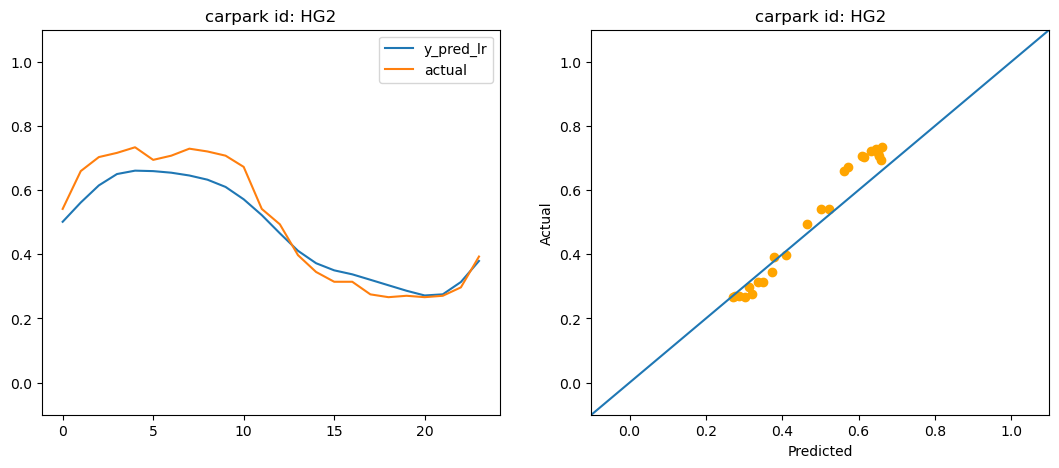

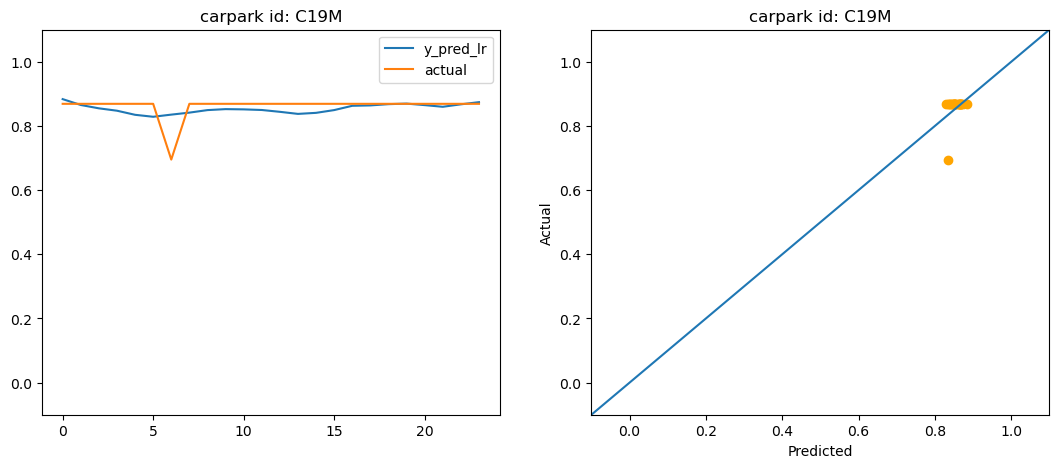

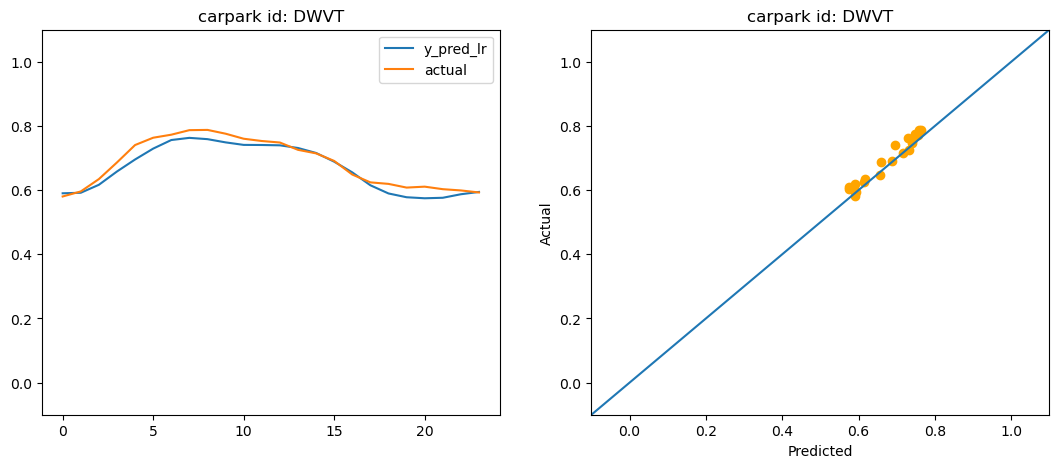

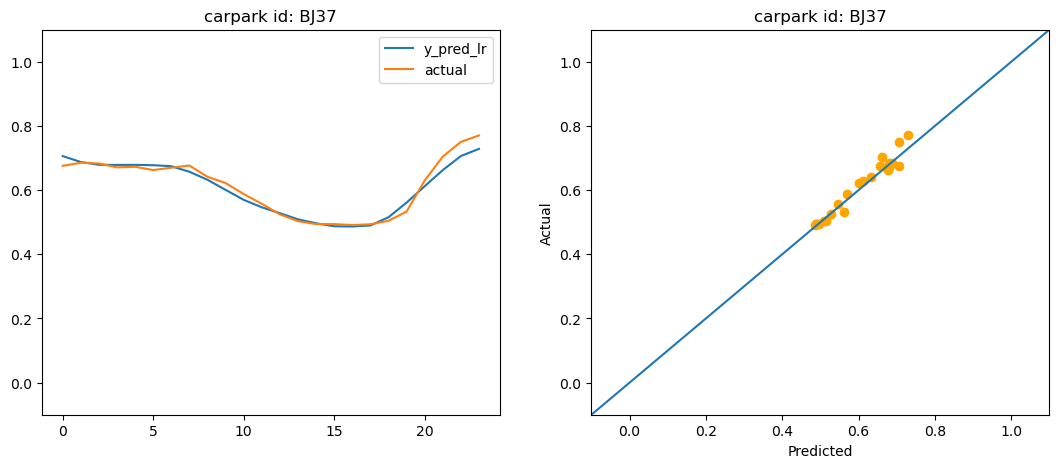

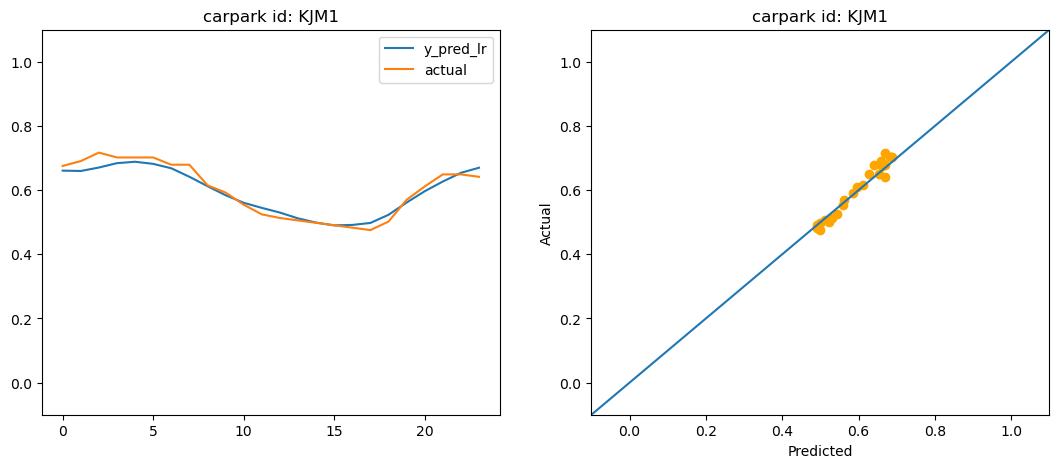

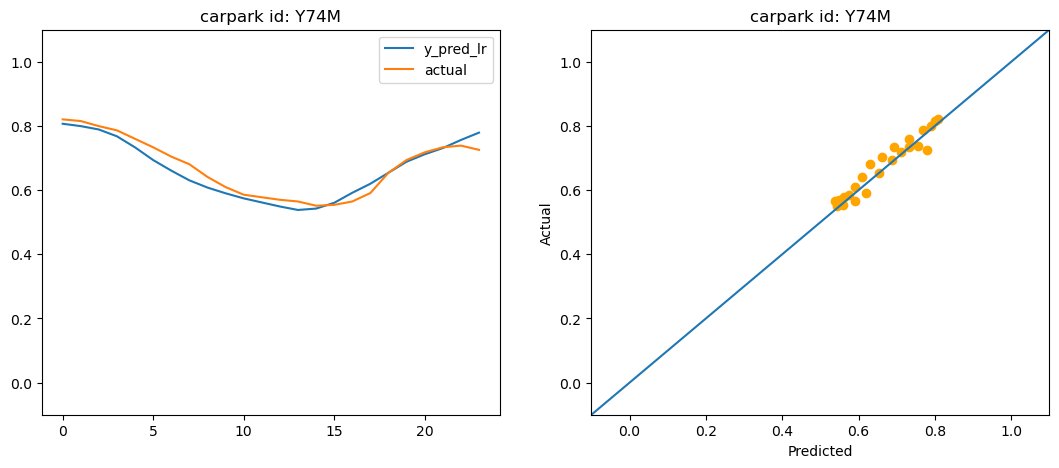

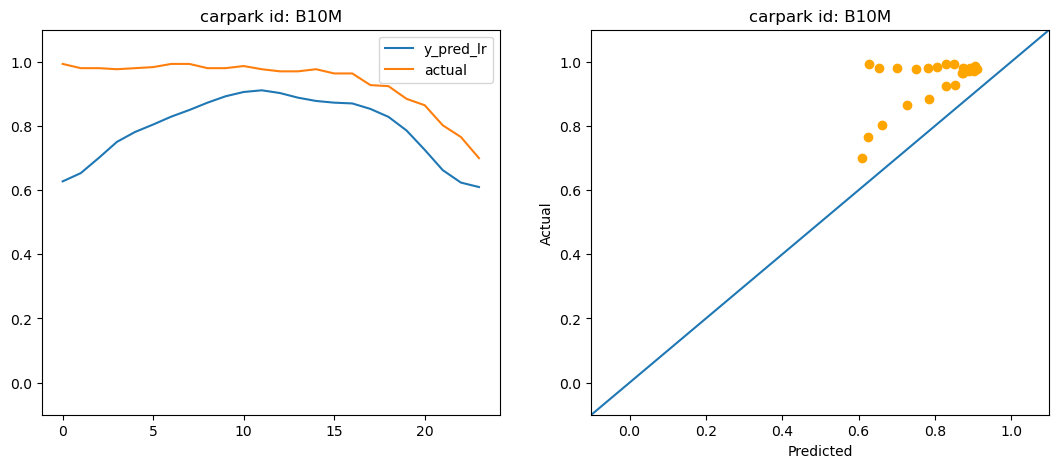

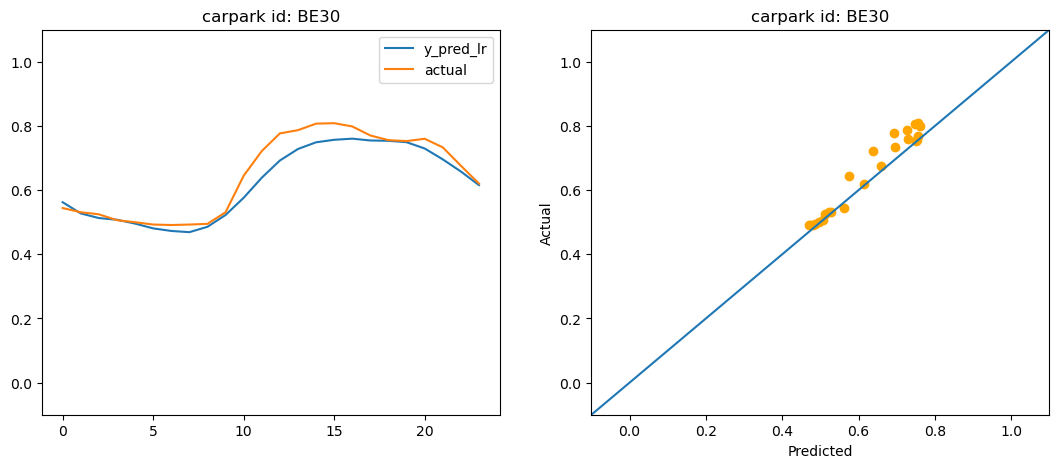

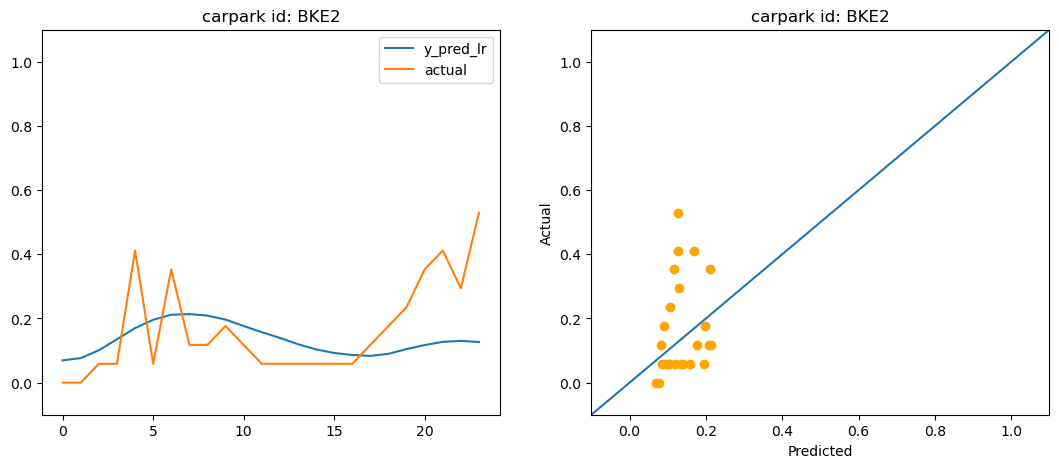

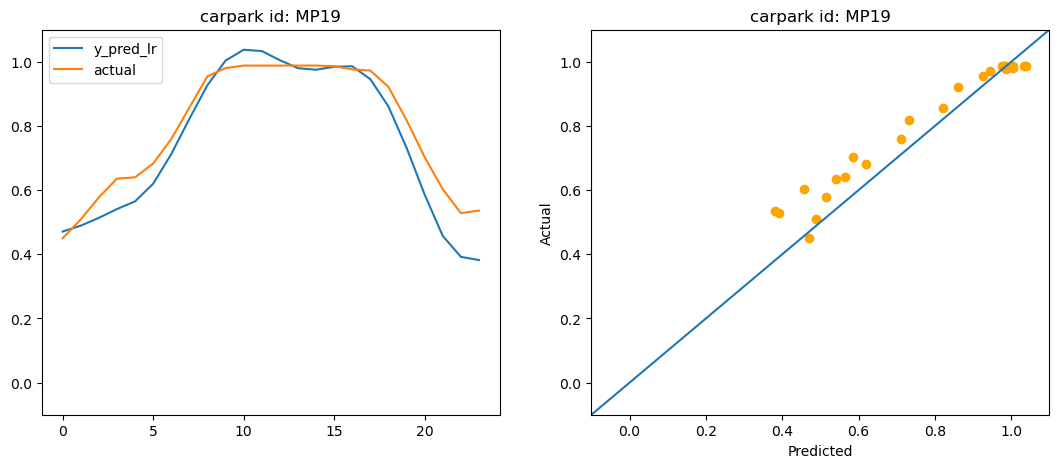

In [48]:
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
randomList = [random.randint(0,len(testY)) for i in range(10)]
print(f"randomList: {randomList}")

for i in randomList:
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.plot(ypred_lstm[i], label='y_pred_lr')
    plt.plot(testY[i], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(ypred_lstm[i], testY[i], label='y_pred_lr', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

### Intepretation of model's performance
The LR model has a very high R Square value of 0.948 which indicates a good fit between predicted and actual value. It means that the output's variance can be very well explained by the variance in the input features.

The percentage error at 4.07% means that the predicted values are very close to the actual values.

From these metrics, it can be seen that LR is a fairly good model for this data distribution.

From the randomly selected scatter plots, we can see that the points are all very close to the line y=x, which means that the predicted availability is very close to the actual availability.

Thus, based on above evidence, the model is a good fit for our distribution. We have established that LR model is a good fit from Q2 and the above substantiation.

In [49]:
lstm_r2 = metrics.r2_score(testY, ypred_lstm)
lstm_mse = metrics.mean_squared_error(testY, ypred_lstm)
lstm_abs_error = mean_absolute_error(testY, ypred_lstm)
print(f"Model's r2score: {lstm_r2},\nMSE: {lstm_mse},\nPercentage Error: {lstm_abs_error*100} %\n")

Model's r2score: 0.9465795668153526,
MSE: 0.005745453025413467,
Percentage Error: 4.315765648142372 %



### Error vs Time graph¶
From the graphs below, we can see that our predictions are extremely accurate in the short run and we can see that mean absolute error plateaus at a low value that is less than 0.045. The mean squared error can also be seen increasing at a decreasing rate to about 0.65% at 20hrs after the keyed in time. Overall, the predictions are extremely accurate for the next 24hrs with its accuracy slowly dwindling

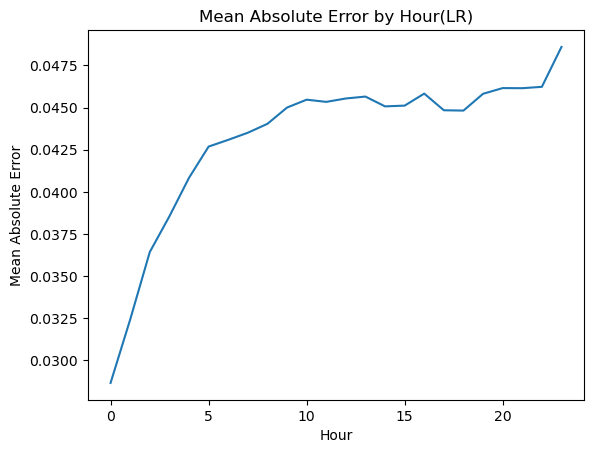

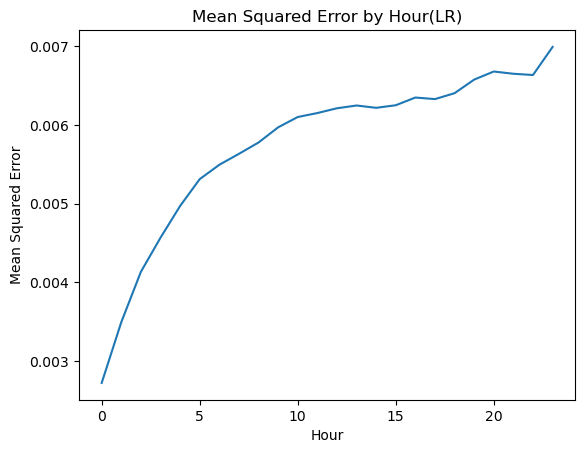

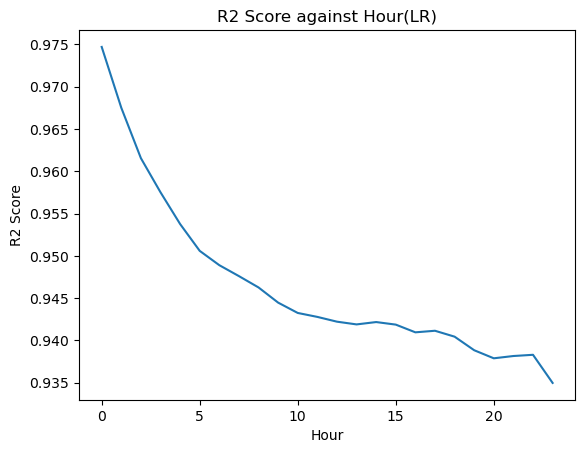

In [50]:
ae_by_hr = []
mse_by_hr = []
r2_by_hr = []
for i in range(24):
    # print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY[:,i], y_pred_lr[:,i])) )
    # print("               R2 Score is {}" .format(r2_score(testY[:,i], y_pred_lr[:,i])) )
    mse = mean_squared_error(testY[:,i], ypred_lstm[:,i])
    ae = mean_absolute_error(testY[:,i], ypred_lstm[:,i])
    r2 = r2_score(testY[:,i], ypred_lstm[:,i])
    # print("               Absolute Error is {}%" .format(100*ae))
    ae_by_hr.append(ae)
    mse_by_hr.append(mse)
    r2_by_hr.append(r2)
plt.plot(ae_by_hr)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(mse_by_hr)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(r2_by_hr)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()

# Overall Flow

In [26]:
#import libraries
from queue import PriorityQueue
from datetime import timedelta
import pickle
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import pandas as pd
import numpy as np
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")

from api_utils import getDataAtTimestamp, json2csv, postalcode2xy

ModuleNotFoundError: No module named 'retry'

### Helper methods to our app

In [11]:
def update_rencet_csv(time_now, recent):
    '''
    update recent data from API and store locally in a csv file
    '''
    range = timedelta(hours=191)
    start = time_now - range
    end = time_now
    for date in pd.date_range(start, end, freq='1h'):
        if date not in recent.index:
            recent.loc[date] = np.nan
            year, month, day, hour, mins = date.year, date.month, date.day, date.hour, date.minute+1
            try:
                raw_data = getDataAtTimestamp(str(year), str(month), str(day), str(hour), str(mins))
            except:
                continue
            raw_df = json2csv(raw_data, date)
            raw_df['lots_available'] = raw_df['lots_available'].astype(float)
            raw_df['total_lots'] = raw_df['total_lots'].astype(float)
            raw_df['available rate'] = raw_df['lots_available'] / raw_df['total_lots']
            for id in raw_df.carpark_number:
                if id in recent.columns:
                    recent.loc[date, id] = raw_df[raw_df.carpark_number == id]['available rate'].values[0]
                else:
                    print("Id not seen!")
    recent.to_csv("./data/recent.csv")

def find_nearest(x, y, location_dict) -> List[Tuple[float, str]]:
    '''
    Sort carparks by distance to the given location
    '''
    shortest = PriorityQueue()
    for key, (loc, addr) in location_dict.items():
        dist = (loc[0] - x)**2 + (loc[1] - y)**2
        shortest.put((-dist, key))
    size = shortest.qsize()
    res = [shortest.get() for i in range(size)]
    res.reverse()
    return res

def create_location_dict(loc_info: pd.DataFrame) -> Dict[str, Tuple[Tuple[float, float], str]]:
    '''
    Create a dictionary of carparks' location and address with carpark number as key
    '''
    location_dict = {}
    for row in loc_info.iterrows():
        content = row[1]
        name = content[0]
        addr = content[1]
        location = (content[2], content[3])
        location_dict[name] = (location, addr)
    return location_dict

def init():
    '''
    Initialize the app data, including recent data, location dictionary and model
    '''
    model = pickle.load(open('models/mlp_sklearn_model.sav', 'rb'))
    print(colored("Model loaded!", "green"))
    recent = pd.read_csv("./data/recent.csv")
    recent['timestamp'] = pd.to_datetime(recent['timestamp'])
    recent = recent.set_index('timestamp')
    print(colored("Recent data loaded!", "green"))
    loc_info = pd.read_csv("./data/hdb-carpark-information.csv")
    location_info = create_location_dict(loc_info)
    return model, recent, location_info

def get_pred_inputs(recent: pd.DataFrame, id: str):
    '''
    Get the inputs for the model from the recent data based on the carpark number
    '''
    time_now = pd.Timestamp.now()
    time_now = time_now.floor('1h')
    range = timedelta(hours=191)
    if time_now not in recent.index:
        print(colored("Updating recent data! Please wait", "green"))
        update_rencet_csv(time_now, recent)
    most_recent = recent[id][time_now - range: time_now]
    return most_recent.values.reshape(1, -1)

def find_by_location(model,
                                    recent: pd.DataFrame,
                                    carpark_info: Dict[str, Tuple[Tuple[float, float], str]],
                                    x, y):
    """
    Find the nearest 5 carparks to the given location and predict the available rate
    """
    print(colored("Finding nearest carpark...", "green"))
    top5 = find_nearest(x, y, carpark_info)
    res = []
    for ele in top5:
        id = ele[1]
        if id not in recent.columns:
            print(f"We do not have data for the nearby carpark {id}")
            continue
        input = get_pred_inputs(recent, id)
        prediction = model.predict(input)[0]
        res.append((ele[0], ele[1], prediction))
        if (len(res) == 5):
            break
    return res

### main app flow

In [12]:
def app():
    model, recent, location_dict = init()
    print("* Welcome to the carpark availability prediction system")
    print("* Where would you like to go?")

    while True:
        postal_code = input("Enter your destination postal code: ")
        print(postal_code)
        try:
            x, y = postalcode2xy(postal_code)
            best_options = find_by_location(model, recent, location_dict, x, y)
            break
        except:
            print(colored("Invalid Postal Code! Please Try Again", "red"))

    print(colored("Best options is:"))
    print(colored(f"carpark {best_options[0][1]} with distance {-best_options[0][0]}", 'yellow'))
    print(colored("Alternatives are:"))
    for ele in best_options[1:]:
        print(colored(f"carpark {ele[1]} with distance {-ele[0]}"))

    time_now = pd.Timestamp.now()
    time_now = time_now.ceil('1h')
    ranges = [(time_now + timedelta(hours=i)).time() for i in range(0,24,4)]
    print(ranges)
    fig, axs = plt.subplots(min(5, len(best_options)+1), 1, figsize=(10, 25))
    for i in range(len(best_options)):
        axs[i].plot(best_options[i][2])
        axs[i].set_xticks(range(0, 24, 4))
        axs[i].set_xticklabels(ranges)
        axs[i].set_ylim(0, 1)
        axs[i].set_title(f"carpark at {location_dict[best_options[i][1]][1]}\n Distance {-best_options[i][0]}",fontsize=10)
    plt.show()


### Run the app

In [ ]:
app()

Model loaded!
Recent data loaded!
* Welcome to the carpark availability prediction system
* Where would you like to go?
Enter your destination postal code: 138600
138600
Finding nearest carpark...
Invalid Postal Code! Please Try Again
Enter your destination postal code: 270030
270030
Finding nearest carpark...
Invalid Postal Code! Please Try Again
